# Problem Statement

The objective of this analysis is to address the following problem:

> "Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased."

To solve this, we will:

- Generate **100,000 independent samples**, each of size **n = 10**, from the standard normal distribution $N(0, 1)$.
- For every sample, compute two versions of the standard deviation:
  - **Sample Standard Deviation** using `ddof = 1`.
  - **Population Standard Deviation** using `ddof = 0`.
- Compare the distributions of these two methods of calculating the standard deviation by plotting their **histograms on the same axes** with transparency.
- Describe the **visual** and **numerical** differences between the two distributions.
- Explain how and why these differences are expected to change as the **sample size increases**.

The goal is to understand the sampling variability, bias, and distributional behaviour of the standard deviation formulas under repeated sampling.


---

In [57]:
# Libraries Imported

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

---

# Standard Normal Distribution

The Standard Normal Distribution is a continuous distribution, perfectly symmetric around the mean. In a Standard Normal Distribution, values are most concentrated near the centre and become increasingly rare as they move further away from the mean. A standard normal distribution is denoted as \( N(0, 1) \), due to the fact it has a mean of \(0\) and a standard deviation of \(1\).

![Standard Normal Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/640px-Standard_deviation_diagram.svg.png)

The bell-shaped curve of the distribution, also referred to as the Gaussian curve, shows how data points are clustered around the mean. This is further demonstrated by the fact that approximately **68.27%** of all values lie within one standard deviation of the mean. This illustrates, within the distribution, the high concentration around the centre or mean. The distribution has no skew and very light tails, demonstrating how the chances of seeing values far from the mean are minimal. The standard normal distribution plays an integral role in statistical theory. This is further demonstrated in the Central Limit Theorem, which shows the reasoning as to why the averages of independent random variables tend to follow a normal distribution.



## Sample Standard Deviation (ddof=1)

In cases where the data represents a subset of the entire population, a sample standard deviation is generally used. In this case, the standard deviation is calculated with `ddof = 1`. The formula in these circumstances divides by $n - 1$ instead of $n$. This adjustment is known as **Bessel’s correction**.

The sample mean $\bar{x} = \frac{\sum x}{n}$ has a propensity to be nearer the sample observations when compared to the true population mean. In turn, if the formula is not modified (i.e., dividing by $n$), then the actual variability is consistently underestimated. By dividing by $n - 1$, this accounts for the issue by slightly increasing the estimate, in turn making the sample variance an unbiased estimator of the population variance.

Due to the impact of **Bessel’s correction**, the sample standard deviation tends to be slightly larger than the standard deviation computed using division by $n$, especially when the sample size is small. The sample standard deviation is calculated using:

$$
s = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n - 1}}
$$



## Population Standard Deviation (ddof=0)

In cases where the data represents an entire population, a population standard deviation is generally used. In this case, the standard deviation is calculated with `ddof = 0`. The formula in these circumstances divides by $N$. When working with population data, the true population mean $\mu = \frac{\sum X}{N}$ is calculated directly from all available values.

This formula is appropriate only when all population values are known. If mistakenly applied to sample data (using the sample mean instead of the population mean), there would be an underestimation of the true population variability. This is because the sample mean is closer to the sample observations than the true population mean would be, resulting in smaller deviations on average.

The population standard deviation is calculated using:

$$
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (X_i - \mu)^2}
$$

## References For This Section
1. Standard Normal Distribution - https://www.probabilitycourse.com/chapter4/4_2_3_normal.php
2. Standard Normal Distribution - https://www.datacamp.com/blog/standard-normal-distribution
3. Standard Normal Distribution - https://www.geeksforgeeks.org/maths/standard-normal-distribution/
4. Standard Normal Distribution - https://www.analyticsvidhya.com/blog/2020/04/statistics-data-science-normal-distribution/
5. Standard Deviation - https://www.geeksforgeeks.org/maths/standard-deviation-formula/
6. Sample Standard Deviation - https://www.datacamp.com/tutorial/sample-standard-deviation
7. Sample & Population Standard Deviation - https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review
8. Sample vs Population Standard Deviation - https://www.statology.org/population-vs-sample-standard-deviation/
9. Bessels Correction - https://www.geeksforgeeks.org/machine-learning/bessels-correction/
10. Bessels Correction - https://towardsdatascience.com/bessels-correction-why-do-we-divide-by-n-1-instead-of-n-in-sample-variance-30b074503bd9/
11. Sample Mean vs Population Mean - https://www.onlinemathlearning.com/population-mean.html
12. Sample Mean vs Population Mean - https://statisticsbyjim.com/basics/sample-mean-vs-population-mean-symbol-formulas/
13. Degrees of Freedom - https://www.statsdirect.com/help/basics/degrees_freedom.html
14. Degrees of Freedom - https://statisticsbyjim.com/hypothesis-testing/degrees-freedom-statistics/
15. Markdown Equations - https://ashki23.github.io/markdown-latex.html
16. Markdown - https://www.markdownguide.org/basic-syntax/
17. Markdown - https://www.datacamp.com/tutorial/markdown-in-jupyter-notebook
18. Markdown - https://github.com/adam-p/markdown-here/wiki/markdown-cheatsheet



---

# Generating The Samples


In [58]:
rng = np.random.default_rng(0) # Ensuring the same random numbers are generated each time

num_samples = 100000 # Setting number of generated samples to be 100000
sample_size = 10 # Setting size of each sample to be 10 observations

samples = rng.standard_normal(size=(num_samples, sample_size)) # Generating samples from standard normal distribution

samples[:3]  # Return first three samples


array([[ 0.12573022, -0.13210486,  0.64042265,  0.10490012, -0.53566937,
         0.36159505,  1.30400005,  0.94708096, -0.70373524, -1.26542147],
       [-0.62327446,  0.04132598, -2.32503077, -0.21879166, -1.24591095,
        -0.73226735, -0.54425898, -0.31630016,  0.41163054,  1.04251337],
       [-0.12853466,  1.36646347, -0.66519467,  0.35151007,  0.90347018,
         0.0940123 , -0.74349925, -0.92172538, -0.45772583,  0.22019512]])

In [59]:
# Generating sample standard deviation (unbiased)
# Axis 1 indicates we are calculating the standard deviation across the rows (i.e., for each sample)
# ddof=1 sets degrees of freedom to 1, which is used for sample standard deviation
sd_sample = samples.std(axis=1, ddof=1)

sd_sample[:10]  # show first few standard deviations

array([0.78133107, 0.91594062, 0.74051147, 0.72203834, 1.02999039,
       0.81755831, 1.26509651, 1.08975751, 1.01266617, 0.95658268])

In [60]:
# Generating sample standard deviation (unbiased)
# Axis 1 indicates we are calculating the standard deviation across the rows (i.e., for each sample)
# ddof=1 sets degrees of freedom to 0, which is used for population standard deviation
sd_population = samples.std(axis=1, ddof=0)

sd_population[:10]  # show first few standard deviations

array([0.74123574, 0.86893757, 0.70251087, 0.68498572, 0.97713468,
       0.77560392, 1.20017593, 1.03383475, 0.96069948, 0.90749401])

In [61]:
mean_of_sample_means = samples.mean(axis=1).mean() # Calculating mean of sample means to verify it is close to 0

mean_sd_sample = sd_sample.mean() # Calculating mean of sample standard deviations
mean_sd_population = sd_population.mean() # Calculating mean of population standard deviations

mean_of_sample_means, mean_sd_sample, mean_sd_population # Return the means calculated above

(0.0009985706494386212, 0.9735739275905946, 0.9236133245226372)

As all values were generated from the Standard Normal Distribution \(N(0,1)\), it is anticipated that the mean of the sample means is very close to 0, which it is in this case. Based on the concept of the Law of Large Numbers, by calculating the mean of a large number of Sample Means, it should be relatively close to the actual mean of the population.

It can be seen that the population standard deviation mean, where `ddof = 0`, is noticeably below 1. However, this would be expected as variability tends to be underestimated when the population formula is applied to sample data.

It can be seen that the sample standard deviation mean, where `ddof = 1`, is closer to 1. Again this would be expected, as Bessel’s correction ensures the variance is unbiased, however, the standard deviation, especially in cases of small sample sizes, will remain slightly biased downward.



### References for this section
1. Generating Samples using Numpy - https://www.datacamp.com/doc/numpy/random-normal
2. Generating Samples using Numpy - https://numpy.org/doc/2.1/reference/random/generated/numpy.random.standard_normal.html
3. Generating Samples Using Numpy - https://realpython.com/numpy-random-normal/
4. Generating Samples Using Numpy - https://www.geeksforgeeks.org/python/numpy-random-standard_normal-in-python/
5. Generating Samples Using Numpy - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.standard_normal.html
6. Generating Sample & Population Standard Deviation - https://www.datacamp.com/tutorial/sample-standard-deviation
7. Axis Parameter - https://www.statology.org/how-to-compute-standard-deviation-and-variance-with-numpy/
8. Axis Parameter - https://www.statology.org/pandas-standard-deviation-for-each-row/
9. Axis Parameter - https://sparkbyexamples.com/pandas/pandas-dataframe-std-method/
10. Central Limit Theorem - https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/sample-mean/
11. Central Limit Theorem - https://www.scribbr.com/statistics/central-limit-theorem/
12. Central Limit Theorem - https://www.geeksforgeeks.org/maths/central-limit-theorem/
13. Sample vs Population Mean - https://www.statology.org/sample-mean-vs-population-mean/
14. Sample vs Population Mean - https://statisticsbyjim.com/basics/sample-mean-vs-population-mean-symbol-formulas/
15. Law of Large Numbers - https://www.datacamp.com/tutorial/law-of-large-numbers

---

# Plotting Histograms

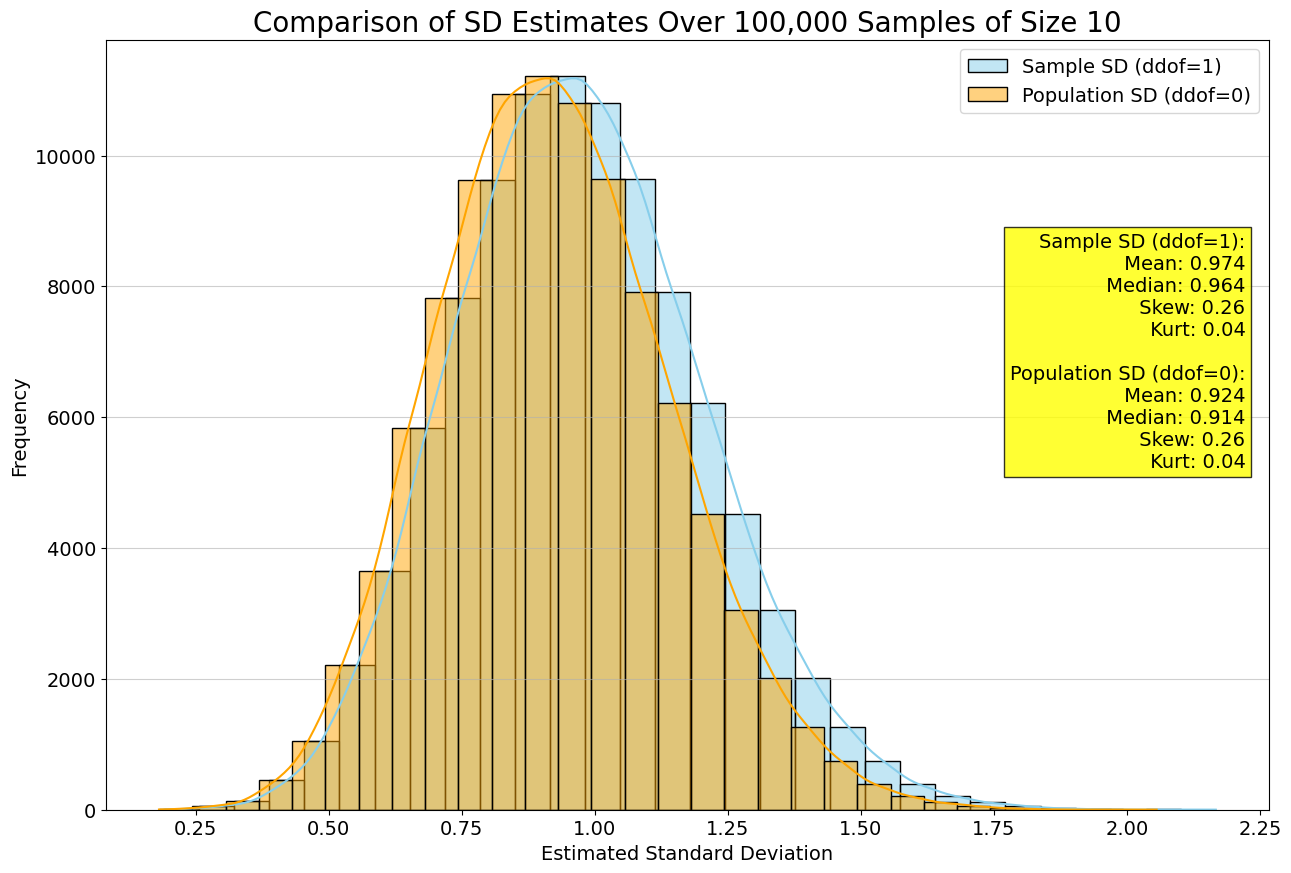

In [62]:
df = pd.DataFrame({
    "sd_sample": sd_sample,
    "sd_population": sd_population
}) # Creating the DataFrame to hold Sample and Population Standard Deviation data.

plt.figure(figsize=(15, 10)) # Setting the figure size for the plot. 15 inches wide by 10 inches tall.

# Plot both histograms with transparency
sns.histplot(
    df["sd_sample"], # Passing sample standard deviation data to be plotted
    kde=True, # Enabling kernel density estimate overlay i.e showing the distribution curve
    color="skyblue", # Setting histogram color to skyblue
    bins=30, # Setting number of bins to 30
    alpha=0.5, # Setting transparency to 50%
    label="Sample SD (ddof=1)", # Setting the label for the sample standard deviation histogram
    edgecolor="black" # Setting edge color of histogram bars to black
)

sns.histplot(
    df["sd_population"], # Passing population standard deviation data to be plotted
    kde=True, # Enabling kernel density estimate overlay i.e showing the distribution curve
    color="orange", # Setting histogram color to orange
    bins=30, # Setting number of bins to 30
    alpha=0.5,  # Setting transparency to 50%
    label="Population SD (ddof=0)", # Setting the label for the population standard deviation histogram
    edgecolor="black" # Setting edge color of histogram bars to black
)

# Titles and labels
plt.title("Comparison of SD Estimates Over 100,000 Samples of Size 10", size=20) # Setting the plot title and its size
plt.xlabel("Estimated Standard Deviation", size=14) # Setting x-axis label and its size
plt.ylabel("Frequency", size=14) # Setting y-axis label and its size
plt.xticks(size=14) # Setting x-axis tick label size
plt.yticks(size=14) # Setting y-axis tick label size
# Adding grid lines for y-axis only
# Setting line style to solid
# Setting transparency to 60%
plt.grid(axis="y", linestyle="-", alpha=0.6)

# Summary statistics
mean_sample = df["sd_sample"].mean() # Calculating mean of sample standard deviations from the DataFrame
mean_pop = df["sd_population"].mean() # Calculating mean of population standard deviations from the DataFrame
median_sample = df["sd_sample"].median() # Calculating mean of sample standard deviations from the DataFrame
median_pop = df["sd_population"].median() # Calculating mean of population standard deviations from the DataFrame
skew_sample = df["sd_sample"].skew() # Calculating skewness of sample standard deviations from the DataFrame
skew_pop = df["sd_population"].skew() # Calculating skewness of population standard deviations from the DataFrame
kurt_sample = df["sd_sample"].kurt()   # Calculating kurtosis of sample standard deviations from the DataFrame
kurt_pop = df["sd_population"].kurt()  # Calculating kurtosis of population standard deviations from the DataFrame

# Legend
legend = plt.legend(fontsize=14, loc="upper right")  # Setting legend font size and location to be upper right

# Stats box — positioned on the right, beneath the legend
plt.text(
    0.98,       # Setting x-position near the right edge
    0.75,       # Setting y-position to be 75% up from the bottom
    f"Sample SD (ddof=1):\n" # Using f-string to format the text box
    f"  Mean: {mean_sample:.3f}\n" # Formatting mean to 3 decimal places
    f"  Median: {median_sample:.3f}\n" # Formatting mean to 3 decimal places
    f"  Skew: {skew_sample:.2f}\n" # Formatting skewness to 2 decimal places
    f"  Kurt: {kurt_sample:.2f}\n\n" # Formatting kurtosis to 2 decimal places
    f"Population SD (ddof=0):\n" # Continuing f-string for population SD
    f"  Mean: {mean_pop:.3f}\n" # Formatting mean to 3 decimal places
    f"  Median: {median_pop:.3f}\n" # Formatting mean to 3 decimal places
    f"  Skew: {skew_pop:.2f}\n" # Formatting skewness to 2 decimal places
    f"  Kurt: {kurt_pop:.2f}", # Formatting kurtosis to 2 decimal places
    transform=plt.gca().transAxes, # Using .gca() to get current axes and make sure text is positioned relative to axes
    fontsize=14,  # Setting font size for the text box
    bbox=dict(facecolor="yellow", alpha=0.8), # Adding a yellow background box with 80% opacity
    verticalalignment="top", # Aligning text to the top of the specified y-position
    horizontalalignment="right" # Aligning text to the right of the specified x-position
)

plt.show()

### References for the Section

1. DataFrame Creation - https://www.w3schools.com/python/pandas/pandas_dataframes.asp
2. Plot Size - https://www.geeksforgeeks.org/python/change-plot-size-in-matplotlib-python/
3. Histogram Creation - https://seaborn.pydata.org/generated/seaborn.histplot.html
4. Histogram Creation - https://www.datacamp.com/tutorial/how-to-make-a-seaborn-histogram
5. Histogram Creation - https://www.geeksforgeeks.org/python/how-to-make-histograms-with-density-plots-with-seaborn-histplot/
6. Plot Title/ Labels/ Ticks - https://www.w3schools.com/python/matplotlib_labels.asp
7. Plot Title/ Labels/ Ticks - https://www.geeksforgeeks.org/python/matplotlib-pyplot-title-in-python/
8. Adding Grid Lines on Y-Axis - https://www.w3schools.com/python/matplotlib_grid.asp
9. Adding Grid Lines on Y-Axis - https://www.geeksforgeeks.org/python/grids-in-matplotlib/
10. Calclating Skew & Kurtosis - https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis
11. Skewness - https://www.geeksforgeeks.org/python/python-pandas-dataframe-skew/
12. Kurtosis - https://www.geeksforgeeks.org/python/python-pandas-dataframe-kurt/
13. Setting Legend Location - https://www.geeksforgeeks.org/python/matplotlib-pyplot-legend-in-python/
14. Summary Statistics Text Box - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html
15. Summary Statistics Text Box - https://www.geeksforgeeks.org/python/matplotlib-pyplot-text-function-in-python/
16. F-String Formatting - https://www.w3schools.com/python/python_string_formatting.asp
17. F-String Formatting - https://www.geeksforgeeks.org/python/formatted-string-literals-f-strings-python/
18. Formatting/Styling of Summary Statistics Text Box - https://python-course.eu/numerical-programming/adding-legends-and-annotations-in-matplotlib.php
19. Plot.gca - https://www.geeksforgeeks.org/python/matplotlib-pyplot-gca-in-python/
20. Plot.gca - https://realpython.com/python-matplotlib-guide/
21. Formatting/Styling of Text Box - https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text.set_bbox
22. Text Alignment - https://matplotlib.org/stable/gallery/text_labels_and_annotations/text_alignment.html




---

# Interpretation of Results

## Visual Interpretation

Overall it can be seen that the shape of the Population and Sample Standard Deviations are quite similar. Both peak around the centre and smoothly ease to the edges. There is, however, an observed visual separation between the two distributions. The population standard deviation, shown by the orange histogram, is slightly more concentrated to the left, while the blue histogram, positioned slightly to the right, represents the sample standard deviation formula.

While the results overlap from using each method, there is an observably lower centre point for the population standard deviation, in comparison to the sample standard deviation. This would fit with the logic that in the case the population standard deviation formula is fitted to sample data, there will be smaller standard deviations calculated. Again as expected, the Sample Standard Deviation is concentrated slightly higher (further right), than the Population Standard Deviation, indicating a better estimation.

By observing the distribution curves, we can see this difference as well. The patterns for the Population and Sample Standard Deviation peaks are the same with the Population Standard deviation peaking earlier than the Sample Standard Deviation. While the overall variance and shape of the distributions are similar, the different formulas implemented influences where the majority of the estimates fall, as shown by the gap between the Population and Sample Standard Deviation curves.

## Statistical Interpretation

Skewness describes how the observations in a dataset are distributed around the centre, indicating whether values are concentrated to one side or are dispersed throughout the dataset. It can be positive or negative, and is typically interpreted as follows:

1. **Skewness between `-0.5` and `0.5`**  
   The distribution is considered fairly symmetrical.

2. **Skewness between `-1` and `-0.5`, or between `0.5` and `1`**  
   The distribution shows a moderate level of skewness.

3. **Skewness less than `-1` or greater than `1`**  
   The distribution is highly skewed, meaning values are noticeably stretched to one side.

Kurtosis describes the degree of "tailness" in a distribution. It measures how sharply peaked a distribution is relative to a Normal Distribution and how the values cluster around the central tendency. It also helps identify whether the tails contain a higher or lower number of extreme values. There are three common types of kurtosis:

1. **Mesokurtic (Normal Distribution)** — Has a kurtosis value close to `3` (or close to `0` when using excess kurtosis). It is relatively symmetrical, with tails that are neither heavy nor light and a peak that is neither very sharp nor notably flat.

2. **Leptokurtic** — Has a kurtosis value greater than `3` (or a positive value when using excess kurtosis). This distribution has heavier tails and a more pronounced peak than a mesokurtic distribution, indicating a higher likelihood of outliers or extreme values.

3. **Platykurtic** — Has a kurtosis value less than `3` (or a negative value when using excess kurtosis). It features a flatter peak and lighter tails compared to a normal distribution, suggesting fewer extreme values or outliers in the data.

Please see below image showing the types of skewness visually: <br>
![Skewness](https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png)

Please see below image showing the types of kurtosis visually: <br>
![Kurtosis](https://miro.medium.com/v2/resize:fit:1400/1*YRMXEsdzPT3PVogRrTe7Jw.png)

When compared to the Sample Standard Deviation (`ddof = 1`), the Population Standard Deviation (`ddof = 0`) has both a lower mean and median. These statistics indicate that, when applied to sample data, the population formula produces smaller estimates. Additionally, the Sample Standard Deviation values lie closer to the true population standard deviation of 1.

As each method’s mean and median are very close, this would indicate a distribution that has little or no skew. This is further supported by the earlier visual analysis of the histograms, as the distribution curves for the Population and Sample Standard Deviations appear fairly symmetric. There is a skewness value of 0.26 for both sets of values, reflective of a slight right-skew but still within the −0.5 to 0.5 threshold, suggesting that each distribution resembles a Normal Distribution.

The above analysis is reinforced by the kurtosis values of 0.04 for both distributions. This value is indicative of a mesokurtic distribution, whereby the tails are neither heavy nor light and the peak is neither very sharp nor notably flat, akin to a Normal Distribution.

Overall, the statistical analysis aligns with the findings from the visual analysis, in that the main difference between the two distibutions is where their values are centred, while their overall shapes remain very similar to each other and to a Normal Distribution.

## Expectations if Sample Size Increased
In the case of the sample size being increased to a larger number, such as 100, I would expect the Population and Sample Standard Deviation histograms to be a lot more aligned, with a much smaller dispersion of the data across the two. It would also be expected that the standard deviation estimates would be more consistently clustered around the true value of 1.

From a visual aspect, it would be expected that the separation between the distribution curves for the Population and Sample Standard Deviations would reduce considerably, as a larger sample size is used and the difference between using `ddof = 0` and `ddof = 1` diminishes. The Population and Sample distribution peaks would be aligned to a greater degree as the estimates become increasingly stable with a higher sample size, and visually, there would be a greater level of overlap between the two.

As the sample size increases, the distribution curves would be almost identical, with both centred almost exactly at 1 with a negligible gap between them. The degree to which each distribution is dispersed would diminish further, and, in turn, visually both the Population and Sample Standard Deviation estimates would be virtually overlapping. As the sample size grows, the differences introduced by using `ddof = 0` or `ddof = 1` become increasingly negligible, resulting in both curves following nearly the same pattern across the plot.

In [63]:
num_samples_100 = 100000 # Setting number of generated samples to be 100000
sample_size_100 = 100 # Setting size of each sample to be 100 observations

samples_100 = rng.standard_normal(size=(num_samples_100, sample_size_100)) # Generating samples from standard normal distribution

In [64]:
# Generating sample standard deviation (unbiased)
# Axis 1 indicates we are calculating the standard deviation across the rows (i.e., for each sample)
# ddof=1 sets degrees of freedom to 1, which is used for sample standard deviation
sd_sample_100 = samples_100.std(axis=1, ddof=1)

# Generating sample standard deviation (unbiased)
# Axis 1 indicates we are calculating the standard deviation across the rows (i.e., for each sample)
# ddof=1 sets degrees of freedom to 0, which is used for population standard deviation
sd_population_100 = samples_100.std(axis=1, ddof=0)

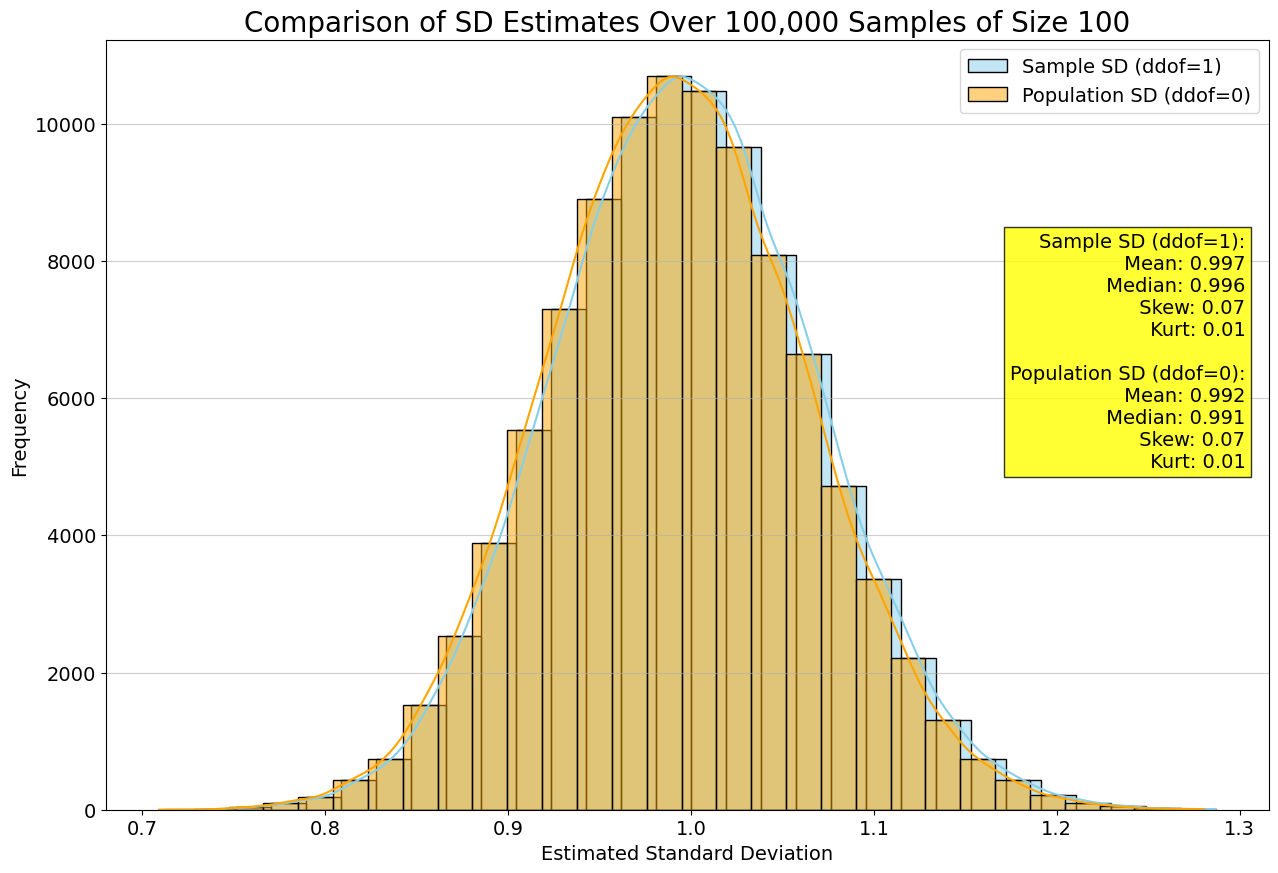

In [65]:
df = pd.DataFrame({
    "sd_sample_100": sd_sample_100,
    "sd_population_100": sd_population_100
}) # Creating the DataFrame to hold Sample and Population Standard Deviation data.

plt.figure(figsize=(15, 10)) # Setting the figure size for the plot. 15 inches wide by 10 inches tall.

# Plot both histograms with transparency
sns.histplot(
    df["sd_sample_100"], # Passing sample standard deviation data to be plotted
    kde=True, # Enabling kernel density estimate overlay i.e showing the distribution curve
    color="skyblue", # Setting histogram color to skyblue
    bins=30, # Setting number of bins to 30
    alpha=0.5, # Setting transparency to 50%
    label="Sample SD (ddof=1)", # Setting the label for the sample standard deviation histogram
    edgecolor="black" # Setting edge color of histogram bars to black
)

sns.histplot(
    df["sd_population_100"], # Passing population standard deviation data to be plotted
    kde=True, # Enabling kernel density estimate overlay i.e showing the distribution curve
    color="orange", # Setting histogram color to orange
    bins=30, # Setting number of bins to 30
    alpha=0.5,  # Setting transparency to 50%
    label="Population SD (ddof=0)", # Setting the label for the population standard deviation histogram
    edgecolor="black" # Setting edge color of histogram bars to black
)

# Titles and labels
plt.title("Comparison of SD Estimates Over 100,000 Samples of Size 100", size=20) # Setting the plot title and its size
plt.xlabel("Estimated Standard Deviation", size=14) # Setting x-axis label and its size
plt.ylabel("Frequency", size=14) # Setting y-axis label and its size
plt.xticks(size=14) # Setting x-axis tick label size
plt.yticks(size=14) # Setting y-axis tick label size

# Adding grid lines for y-axis only
# Setting line style to solid
# Setting transparency to 60%
plt.grid(axis="y", linestyle="-", alpha=0.6)

# Summary statistics
mean_sample_100 = df["sd_sample_100"].mean() # Calculating mean of sample standard deviations from the DataFrame
mean_pop_100 = df["sd_population_100"].mean() # Calculating mean of population standard deviations from the DataFrame
median_sample_100 = df["sd_sample_100"].median() # Calculating mean of sample standard deviations from the DataFrame
median_pop_100 = df["sd_population_100"].median() # Calculating mean of population standard deviations from the DataFrame
skew_sample_100 = df["sd_sample_100"].skew() # Calculating skewness of sample standard deviations from the DataFrame
skew_pop_100 = df["sd_population_100"].skew() # Calculating skewness of population standard deviations from the DataFrame
kurt_sample_100 = df["sd_sample_100"].kurt()   # Calculating kurtosis of sample standard deviations from the DataFrame
kurt_pop_100 = df["sd_population_100"].kurt()  # Calculating kurtosis of population standard deviations from the DataFrame

# Legend
legend = plt.legend(fontsize=14, loc="upper right")  # Setting legend font size and location to be upper right

# Stats box — positioned on the right, beneath the legend
plt.text(
    0.98,       # Setting x-position near the right edge
    0.75,       # Setting y-position to be 75% up from the bottom
    f"Sample SD (ddof=1):\n" # Using f-string to format the text box
    f"  Mean: {mean_sample_100:.3f}\n" # Formatting mean to 3 decimal places
    f"  Median: {median_sample_100:.3f}\n" # Formatting mean to 3 decimal places
    f"  Skew: {skew_sample_100:.2f}\n" # Formatting skewness to 2 decimal places
    f"  Kurt: {kurt_sample_100:.2f}\n\n" # Formatting kurtosis to 2 decimal places
    f"Population SD (ddof=0):\n" # Continuing f-string for population SD
    f"  Mean: {mean_pop_100:.3f}\n" # Formatting mean to 3 decimal places
    f"  Median: {median_pop_100:.3f}\n" # Formatting mean to 3 decimal places
    f"  Skew: {skew_pop_100:.2f}\n" # Formatting skewness to 2 decimal places
    f"  Kurt: {kurt_pop_100:.2f}", # Formatting kurtosis to 2 decimal places
    transform=plt.gca().transAxes, # Using .gca() to get current axes and make sure text is positioned relative to axes
    fontsize=14,  # Setting font size for the text box
    bbox=dict(facecolor="yellow", alpha=0.8), # Adding a yellow background box with 80% opacity
    verticalalignment="top", # Aligning text to the top of the specified y-position
    horizontalalignment="right" # Aligning text to the right of the specified x-position
)

plt.show()


As previously predicted, in the case that the sample size is increased to 100, there is a noticeable difference in the standard deviation estimates. It can be noted that the Population and Sample Standard Deviation histograms are narrower, with estimates concentrated to a much greater degree around the centre. We can see that the gap between both distribution curves, noticeably present when a sample size of 10 is used, has diminished with a higher level of overlap. The estimates that were more concentrated to the left for the Population Standard Deviation are now more centralised, with the Sample Standard Deviation curve closely aligned. The resulting impact of implementing a larger sample size is that the estimates are increasingly consistent, and the difference between using `ddof = 0` and `ddof = 1` becomes much less apparent.


### References for the Code Block
1. Skewness & Kurtosis - https://www.geeksforgeeks.org/data-science/skewness-measures-and-interpretation/
2. Skewness & Kurtosis - https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis
3. Skewness & Kurtosis - https://www.investopedia.com/terms/s/skewness.asp
4. Skewness & Kurtosis - https://www.geeksforgeeks.org/data-science/difference-between-skewness-and-kurtosis/
5. Skewness & Kurtosis - https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/
6. Skewness & Kurtosis - https://www.statology.org/skewness-kurtosis-in-r/
7. Skewness & Kurtosis - https://allen.in/jee/maths/kurtosis-and-skewness
8. Skewness & Kurtosis - https://towardsdatascience.com/skewness-kurtosis-simplified-1338e094fc85/
9. Visual Interpretation - https://www.statology.org/population-vs-sample-standard-deviation/
10. Visual Interpretation - https://bookdown.org/content/1c8fedce-597c-462d-bfdd-e1a0f2c8596d/2-1-population-versus-samples.html
11. Visual Interpretation - https://medium.com/data-science/the-reasoning-behind-bessels-correction-n-1-eeea25ec9bc9
12. Visual Interpretation - https://www.statisticshowto.com/bessels-correction/?utm_source=chatgpt.com
13. Visual Interpretation - https://medium.com/analytics-vidhya/explaining-n-1-the-intuition-behind-bessels-correction-for-sample-variance-daee48bd6fde